In [76]:
%load_ext autoreload
%autoreload 2
import numpy as np
from rentorbuy import RentOrBuy
from asset import annual_to_monthly_stdev, annual_to_monthly_return

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Insert variables
- `monthly_rent`: the monthly rent of an apartment similar to the one you want to buy.
- `house_price`: the price which you expect to pay for the house, i.e. listed price + overbid.
- `additional_monthly_costs`: any additional costs of ownership, e.g. condo fees.
- `additional_purchase_costs`: They include legal fees, title insurance, home inspection, home appraisal, etc.
- `down_payment`: the downpayment you expect to put on your mortgage.
- `mortgage_apr`: the interest on your mortgage in percentage, e.g. $5\%$ (including fees). The interest is assumed to be fixed for the whole loan term.
- `mortgage_amortization_years`: the years that will take you to repay the mortgage.
- `mortgage_additional_payments`: the monthly additional amount that you intend to use to repay your mortgage.
- `maintenance_cost`: the yearly maintenance costs as a percentage of the `house_price`.
- `monthly_property_tax_rate`: the monthly property tax on your house (annual property tax divided by 12).
- `annual_inflation`: the expected avg. annual rate of inflation over the term of the loan.
- `return_ret`: the expected avg. annual return of real estate investements in the area where you are planning to buy over the `mortgage_term`.

- `housing_asset_dict`: distribution of expected monthly returns on real estate (e.g. based on historical data).
- `investment_asset_dict`: distribution of expected monthly returns on alternative investment to real estate (e.g. low cost index fund).

In [77]:
mgt = RentOrBuy(
    monthly_rent=1600,
    house_price=550000,
    down_payment=50000,
    mortgage_amortization_years=30,
    mortgage_apr=0.05,
    additional_purchase_costs=30000,
    additional_monthly_costs=100,
    mortgage_additional_payments=2,
    annual_inflation=0.03,
    monthly_property_tax_rate=0.000042,
    maintenance_cost=0.01,
    housing_asset_dict={
        "dist": np.random.normal, 
        "dist_args": {
            "loc": annual_to_monthly_return(0.03), 
            "scale":  annual_to_monthly_stdev(0.03)}
    },
    investment_asset_dict={
        "dist": np.random.normal, 
        "dist_args": {
            "loc": annual_to_monthly_return(0.06), 
            "scale":  annual_to_monthly_stdev(0.12)}
    },
)

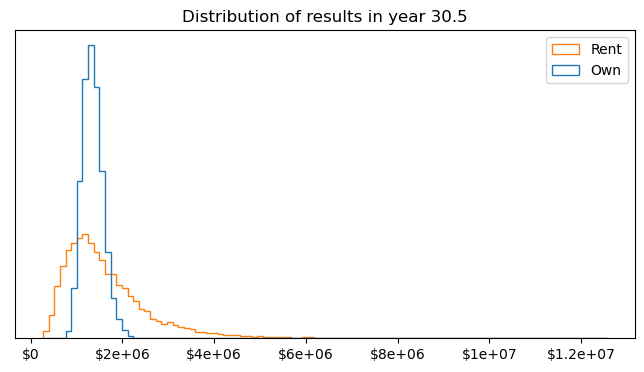

In [78]:
mgt.histogram()

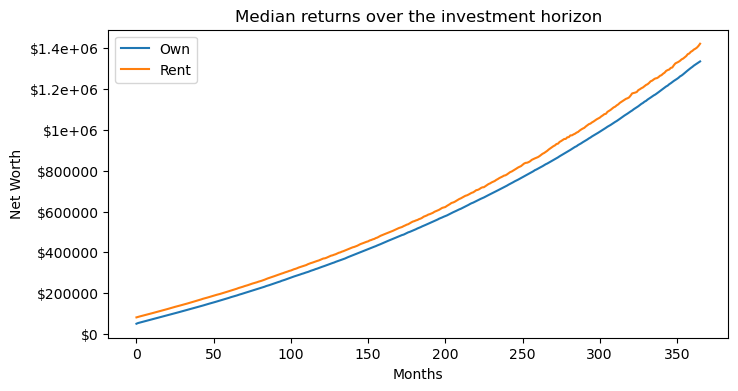

In [79]:
mgt.median_returns_plot()

In [75]:
mgt.mortgage_df

,Begin_balance,Payment,Principal,Interest,Additional_payment,End_balance,total_payment
Date,,,,,,,
2022-10-01,500000.00,2650.28,588.32,2061.96,2.0,499409.68,2652.28
2022-11-01,499409.68,2650.28,590.76,2059.52,2.0,498816.92,2652.28
2022-12-01,498816.92,2650.28,593.20,2057.08,2.0,498221.72,2652.28
2023-01-01,498221.72,2650.28,595.66,2054.62,2.0,497624.06,2652.28
2023-02-01,497624.06,2650.28,598.12,2052.16,2.0,497023.94,2652.28
...,...,...,...,...,...,...,...
2052-11-01,10736.23,2650.28,2606.00,44.28,2.0,8128.23,2652.28
2052-12-01,8128.23,2650.28,2616.76,33.52,2.0,5509.47,2652.28
2053-01-01,5509.47,2650.28,2627.56,22.72,2.0,2879.91,2652.28
